<a href="https://colab.research.google.com/github/omniaghazy/python-with-NTI/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
#Data Preprocessing



#-Import libraries
#-Read DataSet
#-CheckData
#-EDA
#-Missig Values Treatment
#-Transformation
#-Outliers
#-Duplicates
#-Normalization
#-Encoding

# import libraries

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from imblearn.over_sampling import SMOTE


# Read Data Set

In [120]:
df = pd.read_csv("/content/adult.csv")

# check data

In [121]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [123]:
df.shape

(48842, 15)

# check missing values

In [124]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


# check duplicated values

In [125]:
df.duplicated().sum()

np.int64(52)

In [126]:
df.drop_duplicates(inplace=True)

In [127]:
df.duplicated().sum()

np.int64(0)

In [128]:
df.shape

(48790, 15)

# EDA

for numerical col

In [129]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [130]:
df.describe(include="int64")

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [131]:
df.describe(include="object")

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48790,48790,48790,48790,48790,48790,48790,48790,48790
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,15770,22366,6165,19703,41714,32614,43792,37109


# **NUM VS CAT**

# NUMERICAL COL

In [132]:
numerical_cols = df.select_dtypes(include = "int64").columns
numerical_cols

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

**Histogram**

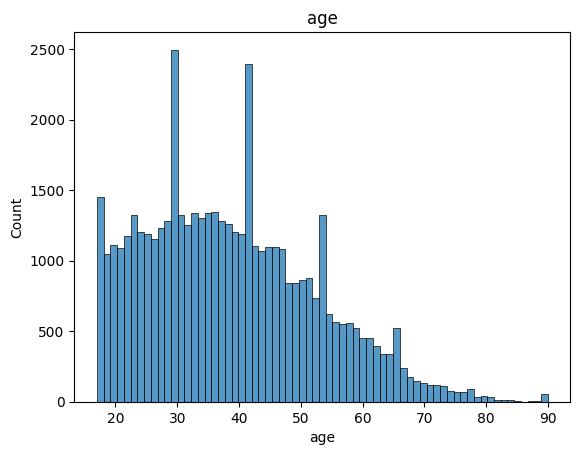

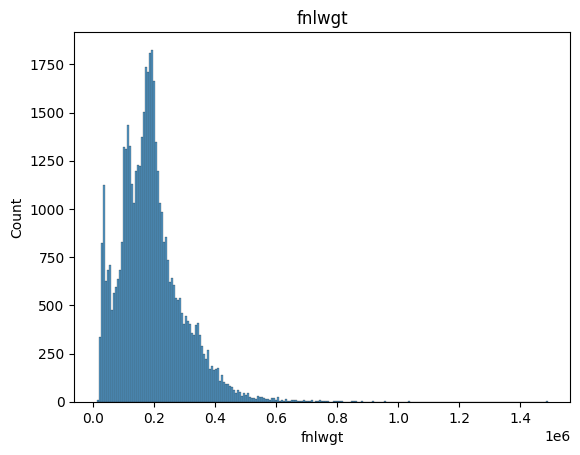

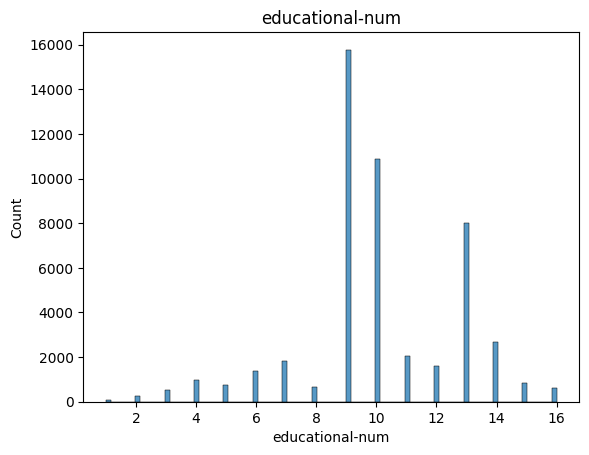

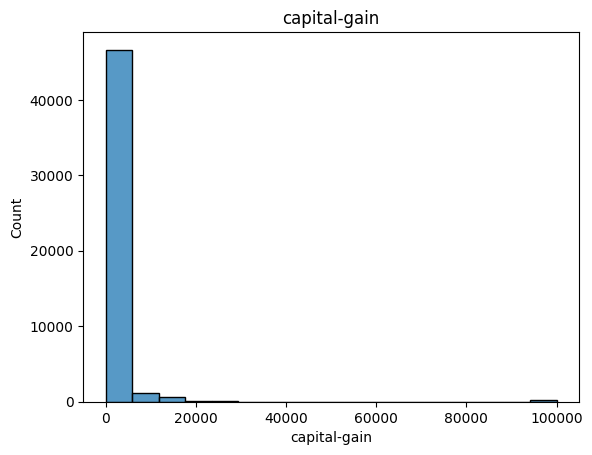

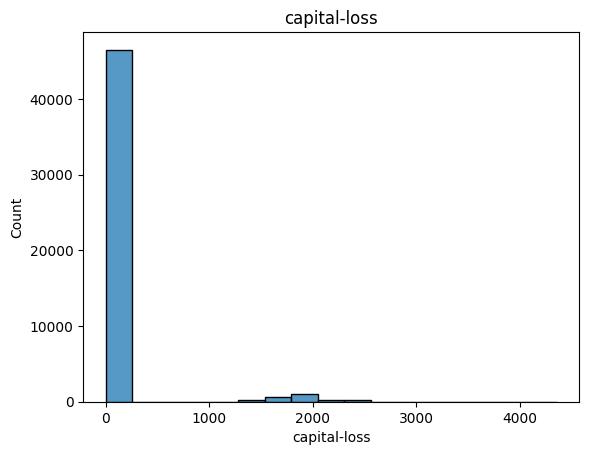

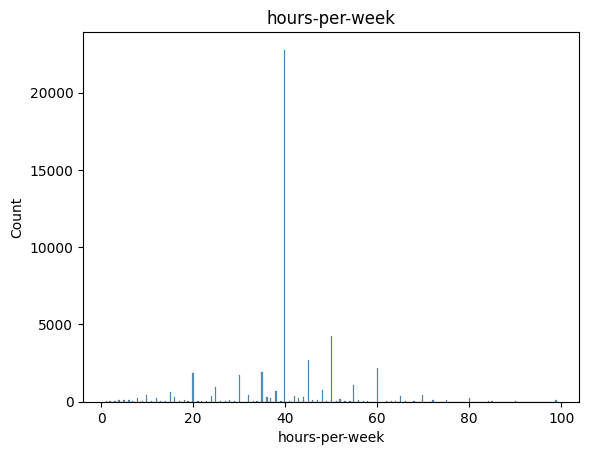

In [133]:
for i in numerical_cols:
  sns.histplot(df[i])
  plt.title(i)
  plt.show()

solve destribution

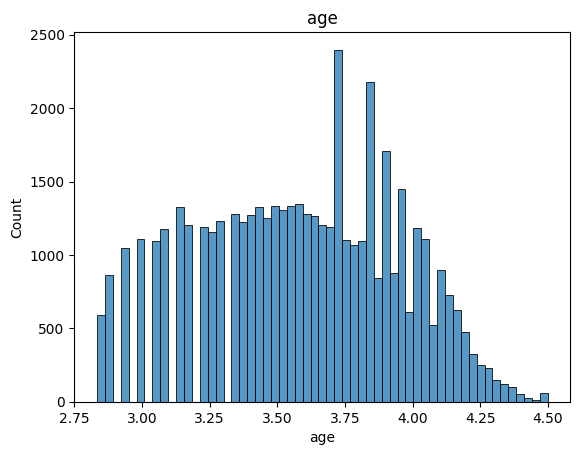

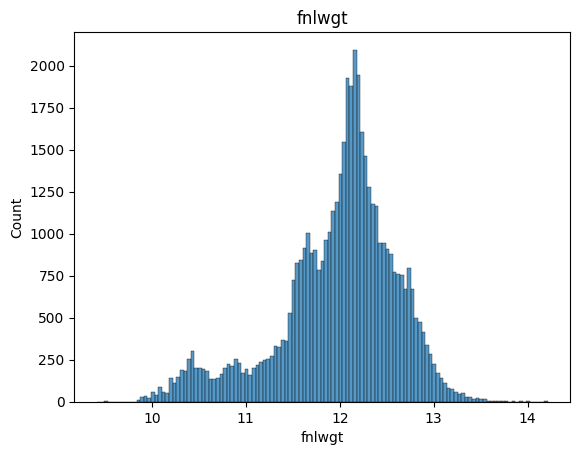

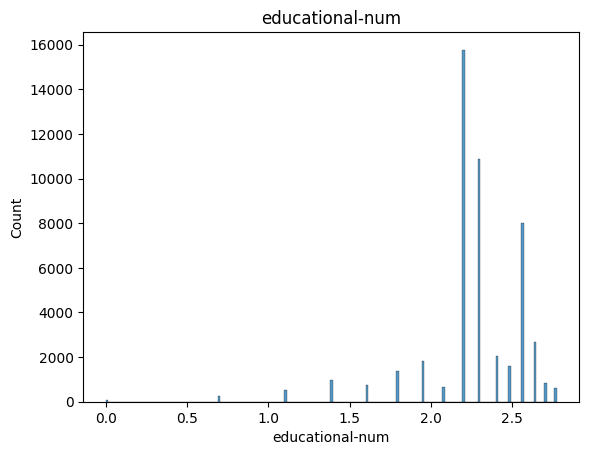

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


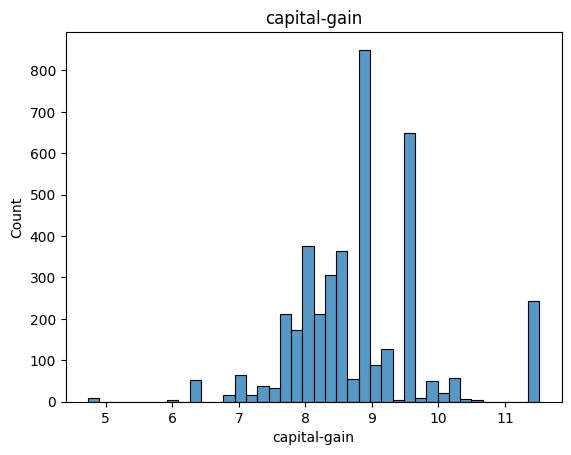

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


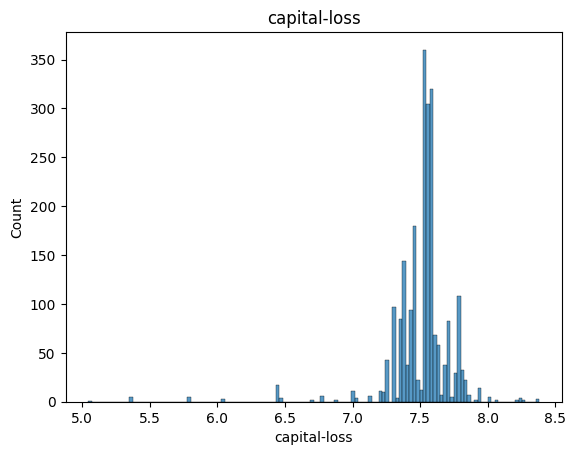

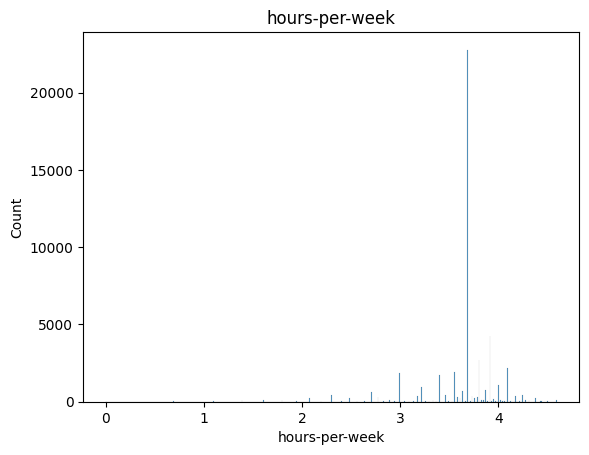

In [134]:
for i in numerical_cols:
  sns.histplot(np.log(df[i]))
  plt.title(i)
  plt.show()

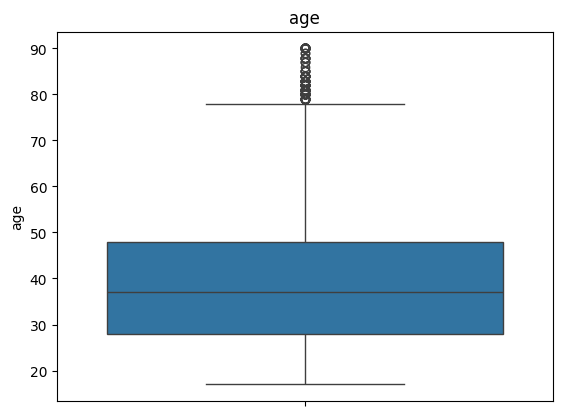

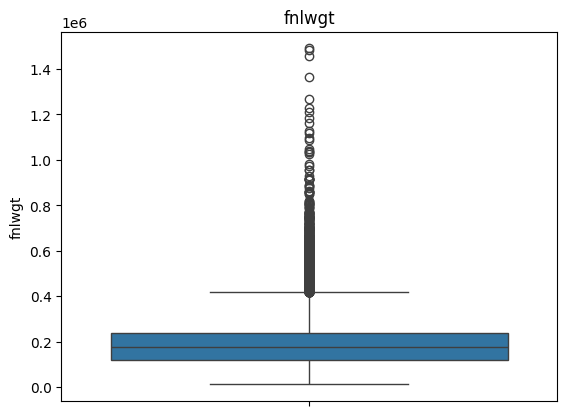

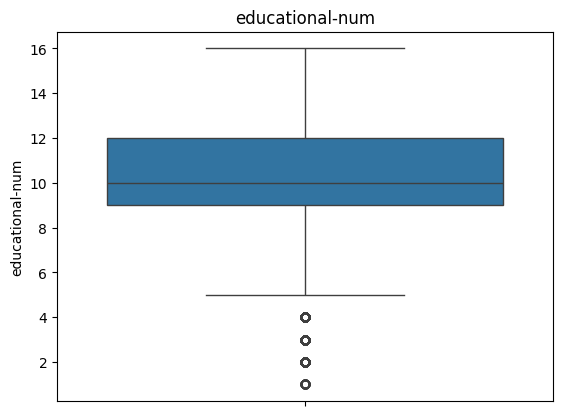

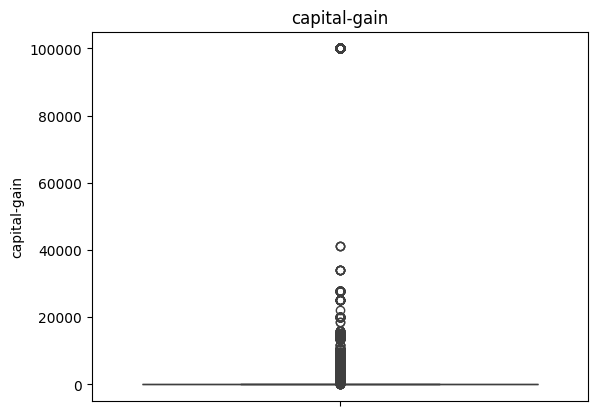

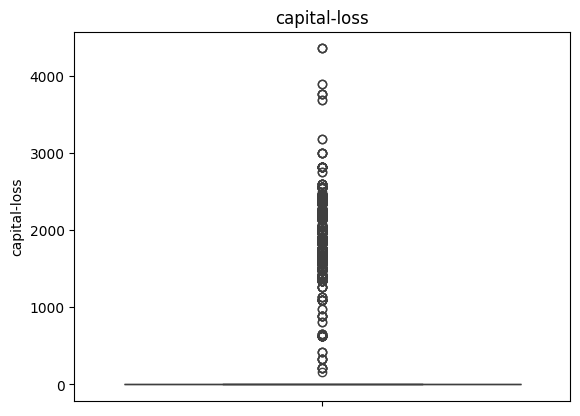

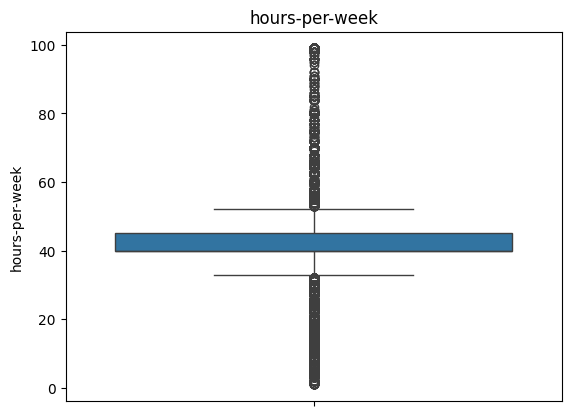

In [135]:
for i in numerical_cols:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

solve outliers

In [136]:

# Apply Winsorization (IQR capping) to each numeric column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower, upper=upper)  # Cap values outside range

print("Outliers have been capped using IQR method.")
df.shape


Outliers have been capped using IQR method.


(48790, 15)

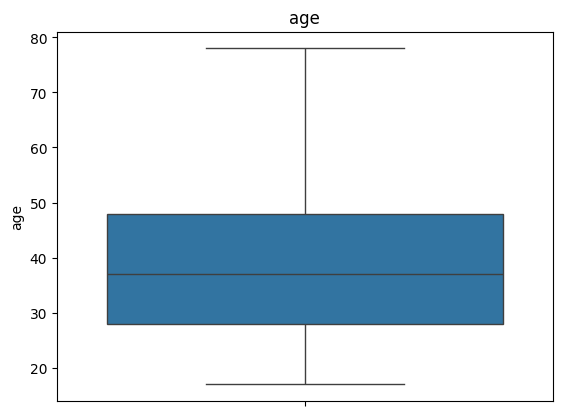

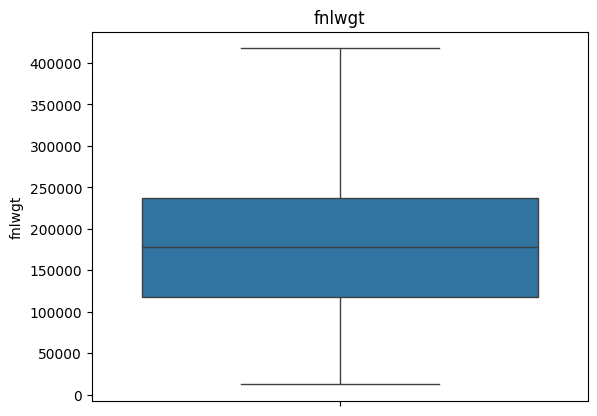

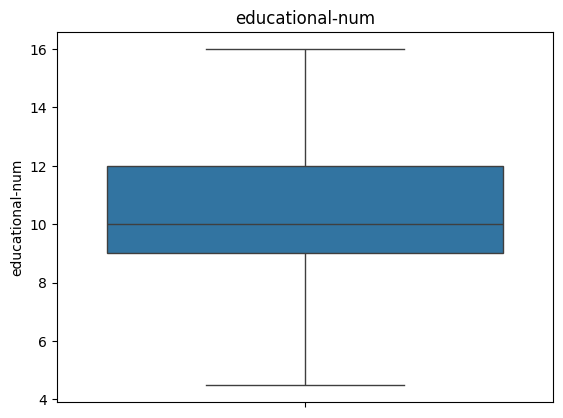

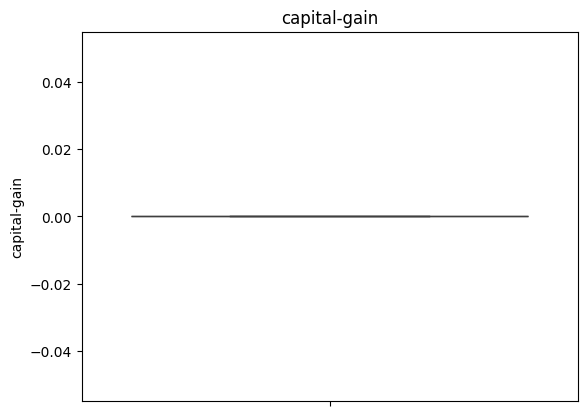

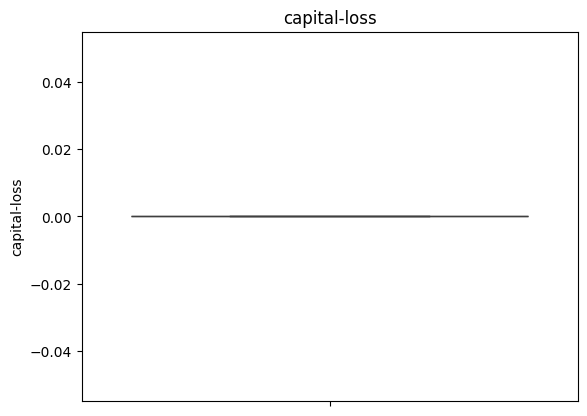

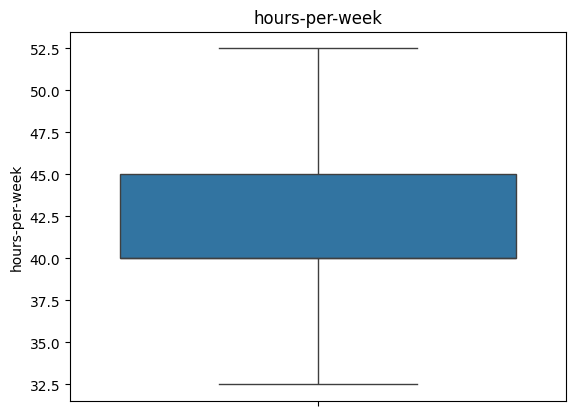

In [137]:
for col in numerical_cols:
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

# categorical cols

In [138]:
categorical_cols = df.select_dtypes(include = "object").columns
categorical_cols
categorical_cols.shape

(9,)

In [139]:
categorical_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64



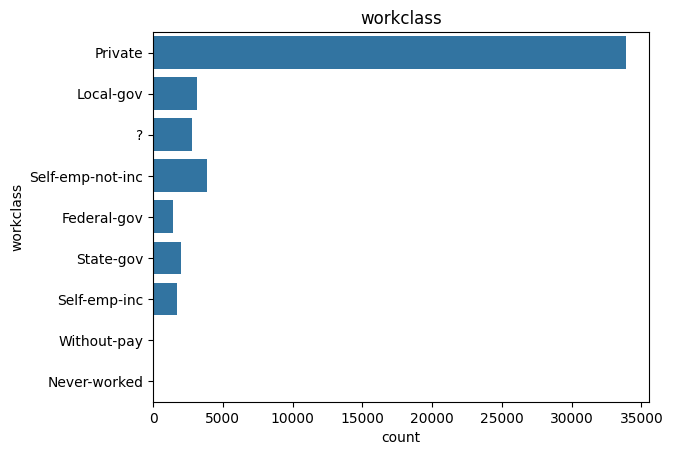

education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64



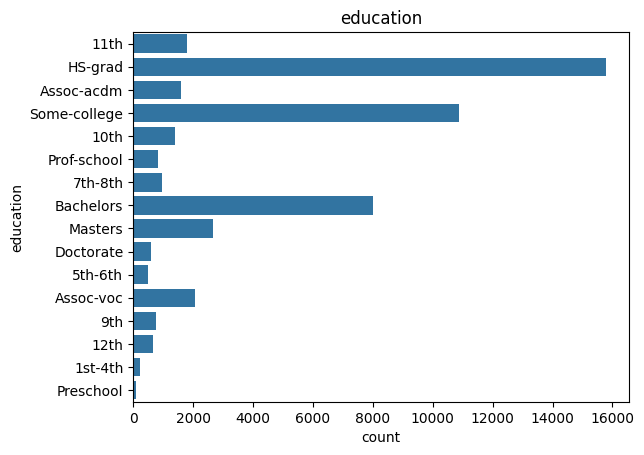

marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: int64



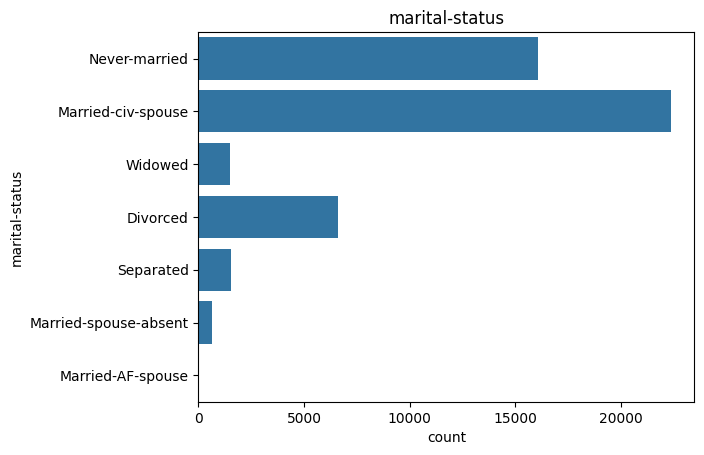

occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64



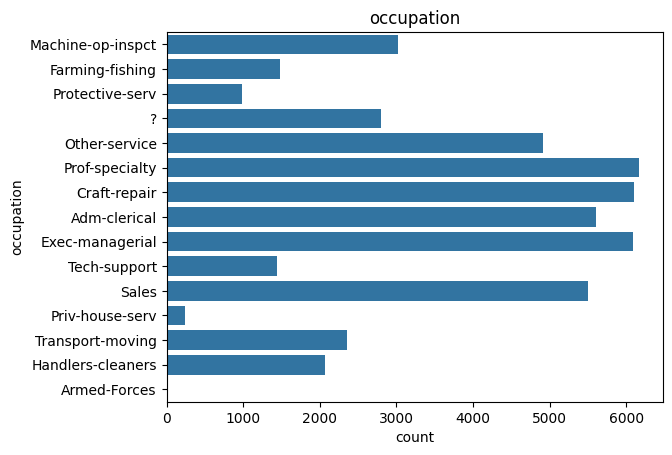

relationship
Husband           19703
Not-in-family     12557
Own-child          7569
Unmarried          5124
Wife               2331
Other-relative     1506
Name: count, dtype: int64



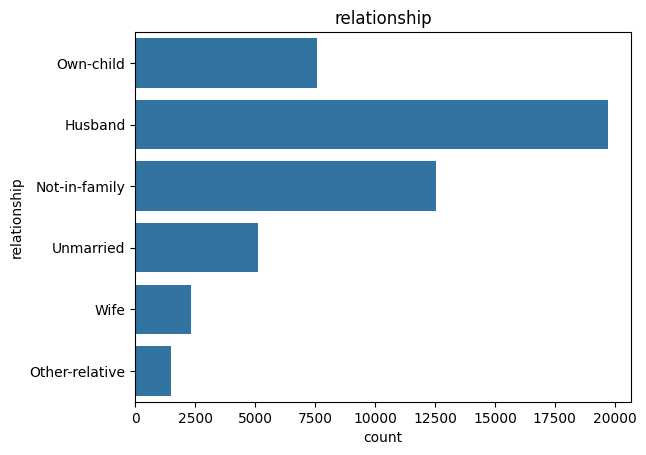

race
White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64



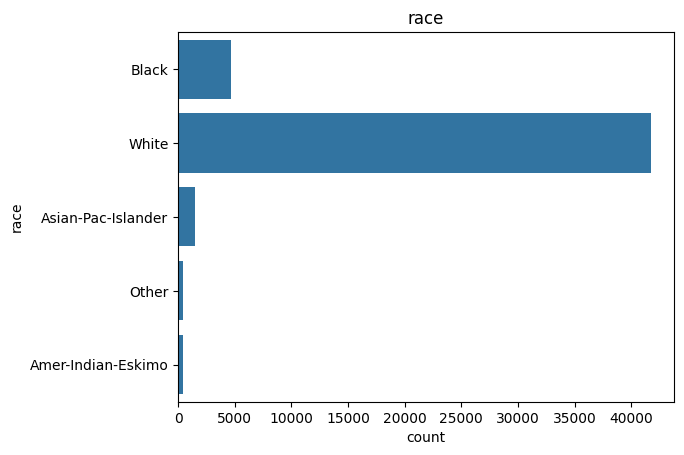

gender
Male      32614
Female    16176
Name: count, dtype: int64



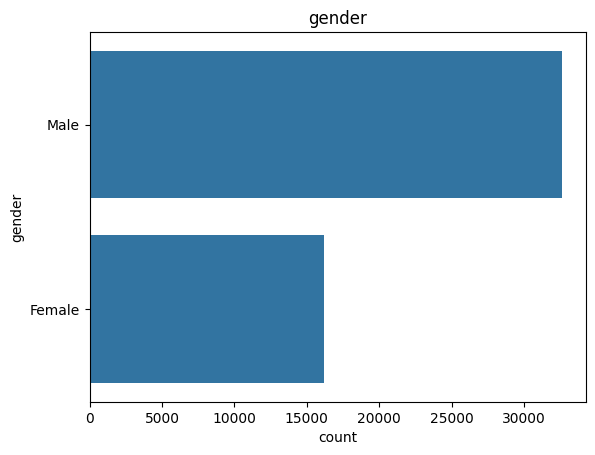

native-country
United-States                 43792
Mexico                          943
?                               856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Vietnam                          86
Guatemala                        86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

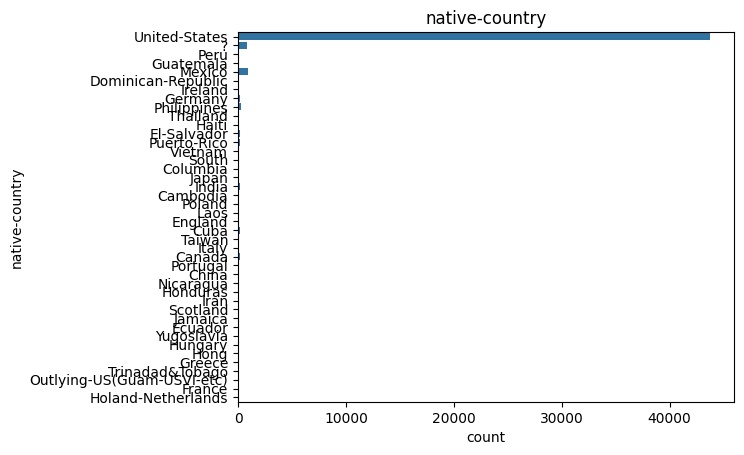

income
<=50K    37109
>50K     11681
Name: count, dtype: int64



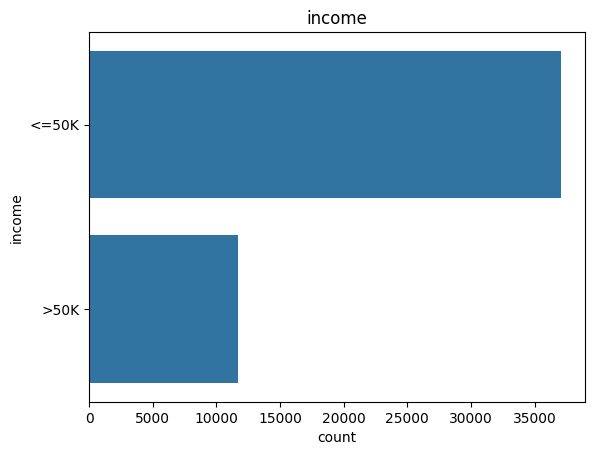

In [140]:
for i in categorical_cols:
  print(df[i].value_counts())
  print()
  sns.countplot(df[i])
  plt.title(i)
  plt.show()

to solve "?" in categorical data

In [141]:
for i in categorical_cols:
 df[i] = df[i].replace("?",df[i].mode()[0])


In [142]:
categorical_cols.shape



(9,)

In [143]:
df.describe(include="object")

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48790,48790,48790,48790,48790,48790,48790,48790,48790
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,36655,15770,22366,8970,19703,41714,32614,44648,37109


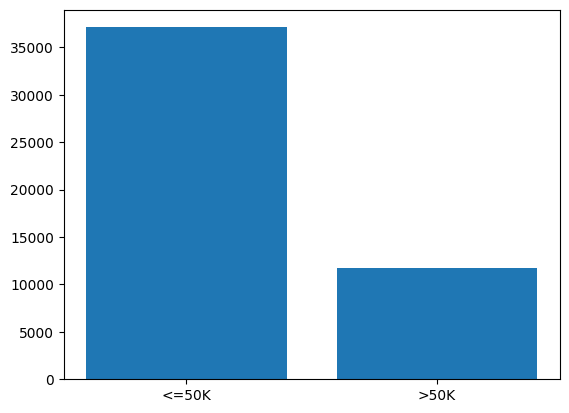

In [144]:
plt.bar(df['income'].value_counts().index,df['income'].value_counts())
plt.show()

In [146]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_cols:
  df[i] = le.fit_transform(df[i])

In [147]:
df.describe(include="int")


,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,native-country,income
count,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.0,48790.0,48790.000000,48790.000000
mean,38.627998,3.099713,10.287989,2.618077,6.153536,1.443472,3.667903,0.668457,0.0,0.0,36.435376,0.239414
std,13.629080,1.111356,3.874617,1.507877,3.969288,1.602571,0.846133,0.470773,0.0,0.0,6.030679,0.426730
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,28.000000,3.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.0,0.0,38.000000,0.000000
50%,37.000000,3.000000,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.0,0.0,38.000000,0.000000
75%,48.000000,3.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.0,0.0,38.000000,0.000000
max,78.000000,7.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,0.0,0.0,40.000000,1.000000


In [148]:
from collections import Counter
print("Class distribution before SMOTE:", Counter(  df['income']))
smote = SMOTE(sampling_strategy='auto', random_state=42)

X = df.drop('income', axis=1)
y = df['income']
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution before SMOTE: Counter({0: 37109, 1: 11681})
Class distribution after SMOTE: Counter({0: 37109, 1: 37109})


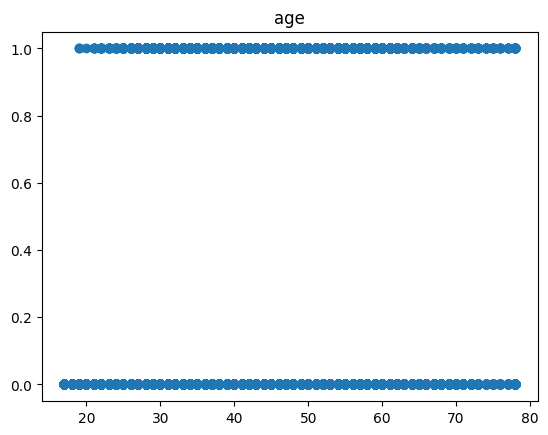

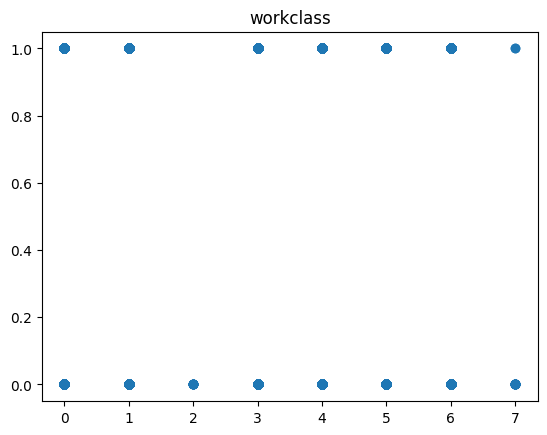

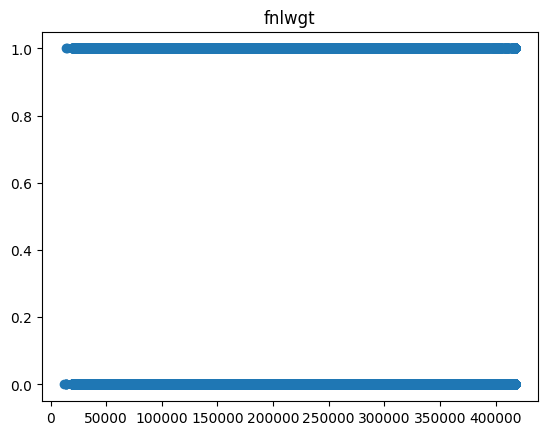

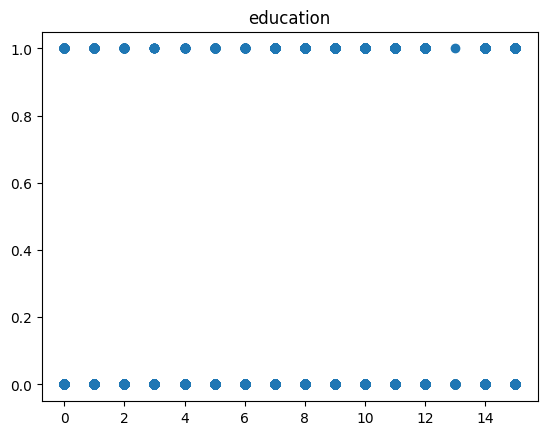

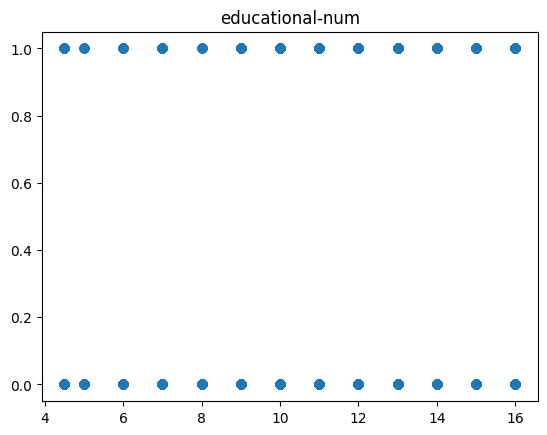

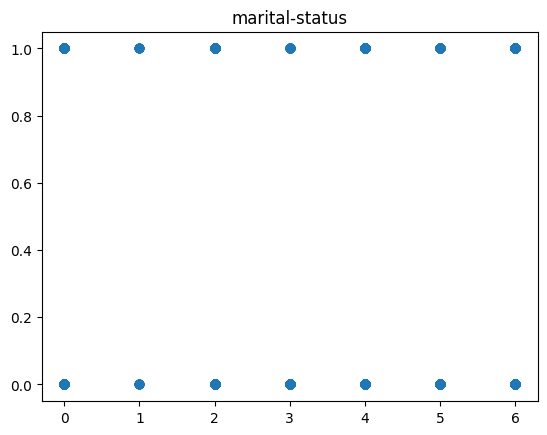

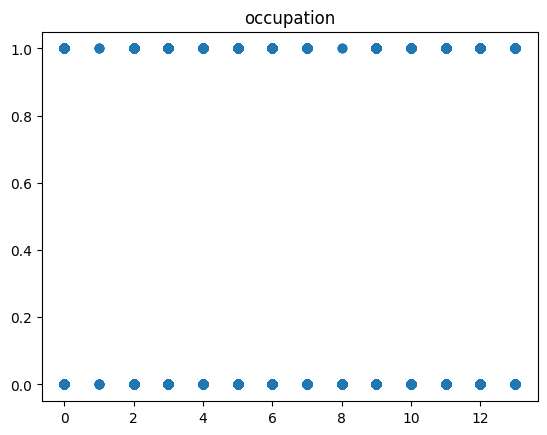

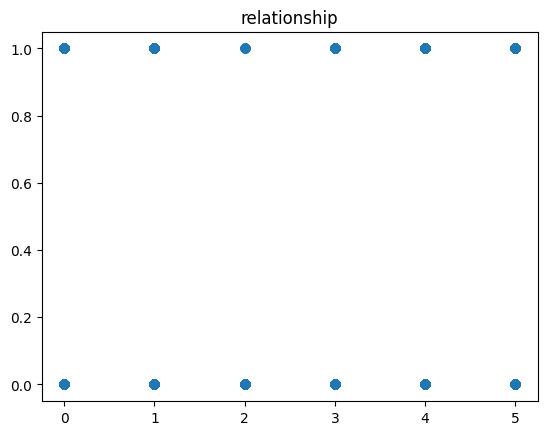

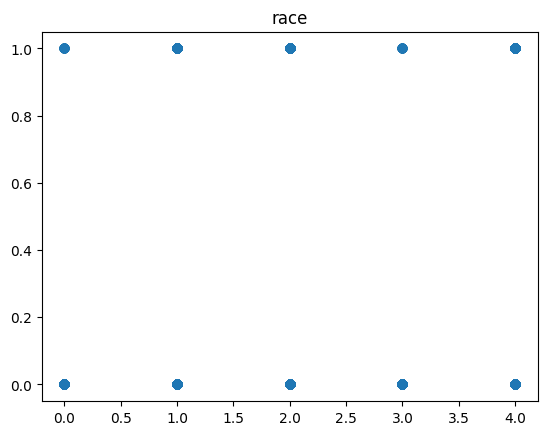

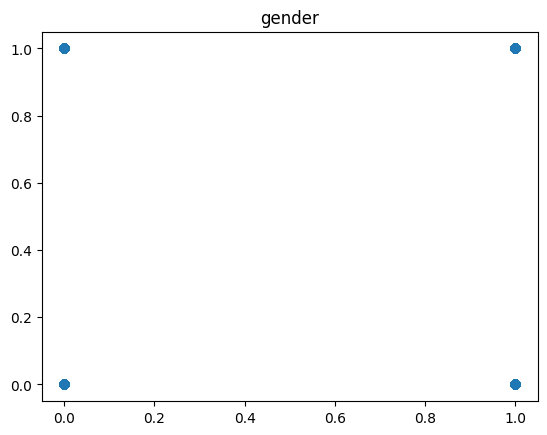

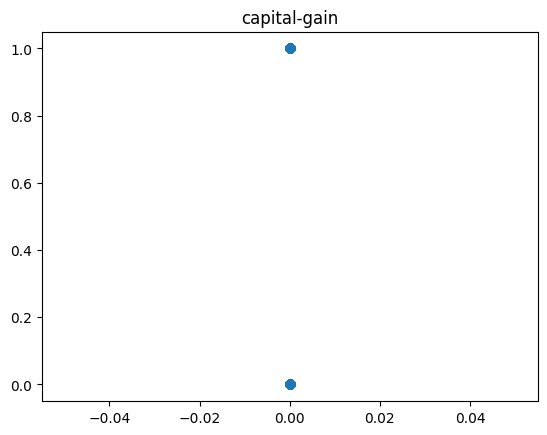

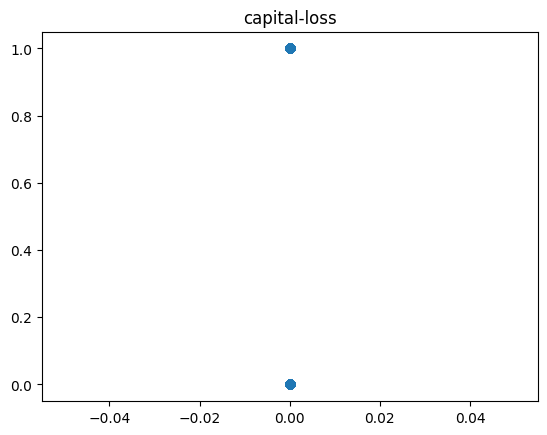

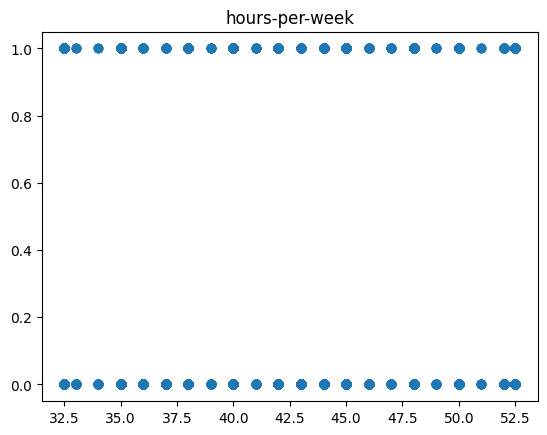

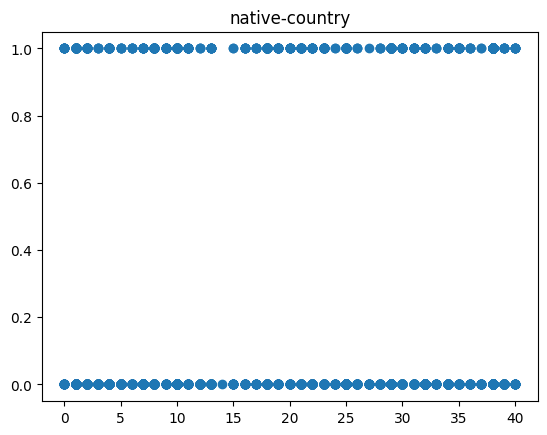

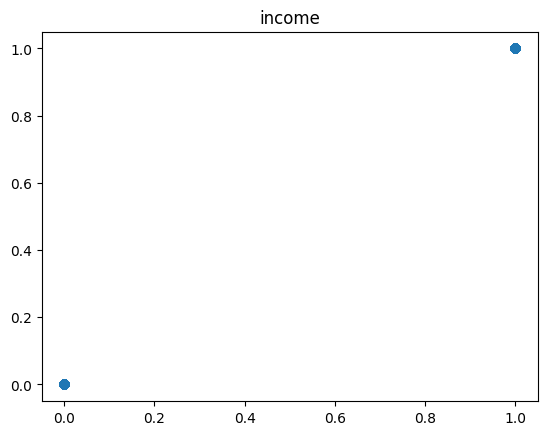

In [150]:
for i in df:
  plt.scatter(df[i],df['income'])
  plt.title(i)
  plt.show()

<Axes: >

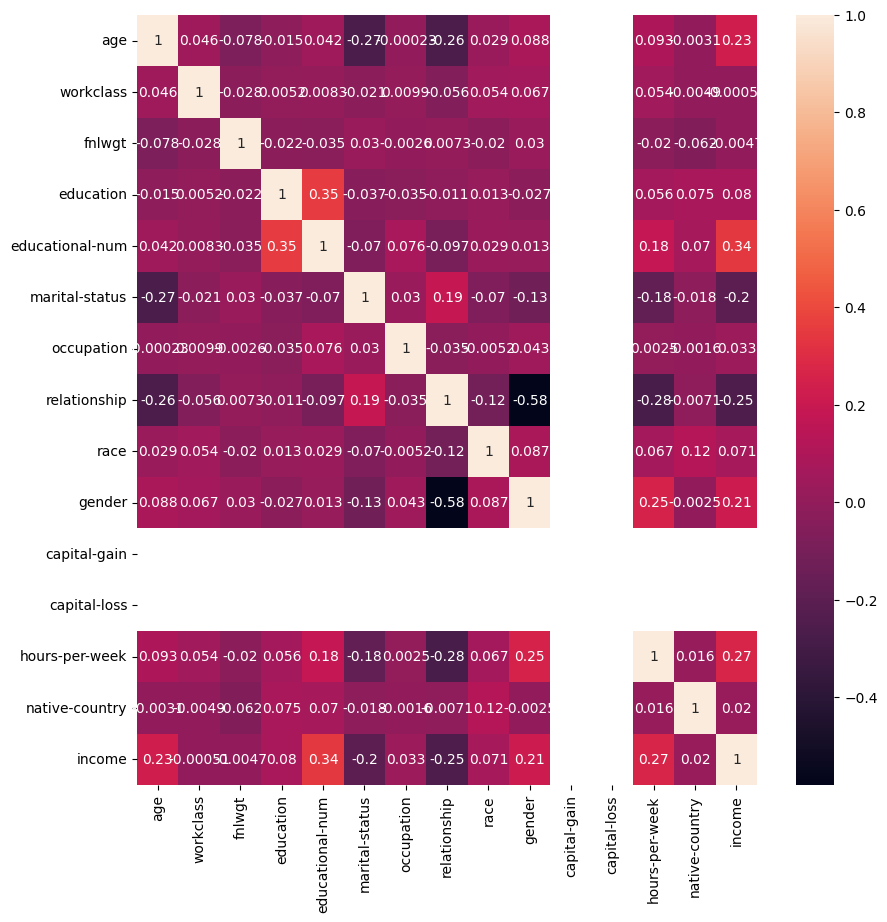

In [151]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [153]:
df.drop(['capital-gain','capital-loss'],axis=1,inplace=True)

<Axes: >

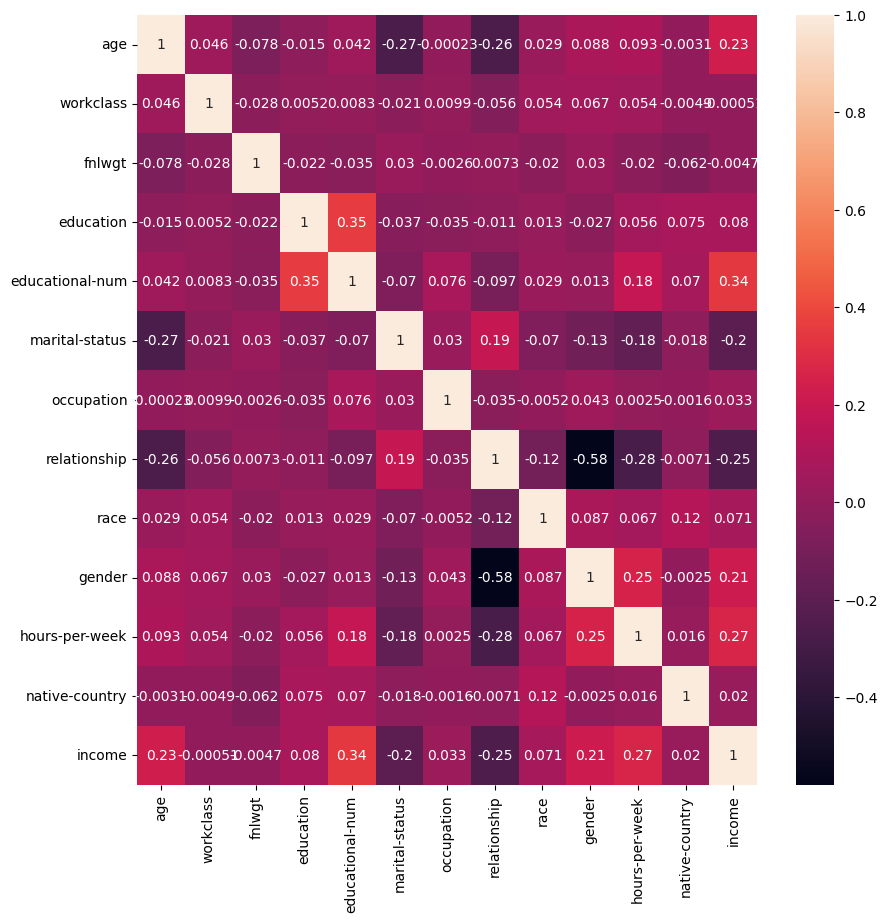

In [154]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)